# そーてぃんぐ (Sorting)

順序関数`lambda a, b : random() < 0.5`を用いて配列`[1, 2, 3, ..., n]`をQuick Sortする。

In [18]:
from random import random

count = 0

def f(a, b):
    global count
    rnd = random() < 0.5
    print("%s < %s ? %s" % (a, b, rnd))
    count += 1
    return rnd

def sort(array, cmp):
    less = []
    greater = []

    if len(array) > 1:
        pivot = array.pop()
        for x in array:
            if cmp(x, pivot):
                less.append(x)
            else:
                greater.append(x)
        return sort(less, cmp)+[pivot]+sort(greater, cmp)
    else:
        return array

print(sort([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], f))

print("# of calls: %s" % count)

1 < 10 ? True
2 < 10 ? False
3 < 10 ? True
4 < 10 ? False
5 < 10 ? True
6 < 10 ? True
7 < 10 ? False
8 < 10 ? True
9 < 10 ? False
1 < 8 ? True
3 < 8 ? False
5 < 8 ? False
6 < 8 ? True
1 < 6 ? True
3 < 5 ? True
2 < 9 ? True
4 < 9 ? False
7 < 9 ? True
2 < 7 ? True
[1, 6, 8, 3, 5, 10, 2, 7, 9, 4]
# of calls: 19


感覚的には,`n=10`の時だいたい平均20くらい。

`# of calls`の確率分布を調べよう！

In [19]:
"""
(dictionary version)

distribution_memo = {}

def mul_dist_by(dist, amount):
    for k in dist.keys():
        dist[k] = dist[k]*amount

def update_dist(dist_src, dist):
    for k in dist.keys():
        if k in dist_src:
            dist_src[k] = dist_src[k] + dist[k]
        else:
            dist_src[k] = dist[k]

def combination(n, m):
    return math.factorial(n)/(math.factorial(m)*math.factorial(n - m))

def distribution(n):
    global distribution_memo
    
    if n in distribution_memo:
        return distribution_memo[n].copy()
    
    dist = {}
    
    if n > 1:
        # The number of "less" elements (less_size) is in range [0, n-1].
        # The probability distribution for given less_size is (n-1)C(less_size)*distribution(less_size) + (n-1)C(greater_size)*distribution(greater_size), 
        #  where greater_size = n - 1 - less_size.
        for less_size in range(0, n):
            greater_size = n - 1 - less_size
            
            dist_less = distribution(less_size)
            mul_dist_by(dist_less, combination(n - 1, less_size))
            
            dist_greater = distribution(greater_size)
            mul_dist_by(dist_greater, combination(n - 1, greater_size))
            
            update_dist(dist, dist_less)
            update_dist(dist, dist_greater)
    else if n = 1:
        dist = {1.0: 1.0}
    else:
        raise Exception("Undefined for given value");
    
    distribution_memo[n] = dist.copy()
    return dist

print(count_distribution(10))

print("distribution of # of calls: %s" % distribution)
"""

None

In [385]:
import numpy
import math

distribution_memo = [numpy.array([1.0]), numpy.array([1.0])]

def combination(n, m):
    return math.factorial(n)/(math.factorial(m)*math.factorial(n - m))

def distribution(target):
    global distribution_memo
    
    for n in range(len(distribution_memo), target + 1):
        dist = numpy.array([0.0])

        # The length of "less" (less_size) is in range [0, n - 1].
        # The length of "greater" (greater_size) is "n - 1 - less_size".
        #   P(len(less) = less_size) = (1/2**(n - 1))*combination(n - 1, less_size)
        # For given less_size:
        # - Let calls(x) be the random variable of the number of "f" calls of "sort([1, ..., x], f)".
        # - Then, # of calls for less_size is
        #    calls(less_size) + calls(greater_size) + n - 1
        # - Thus, the distribution of # of calls is
        #    shift(conv(distribution(less_size), distribution(greater_size)), n - 1)
        #  where
        #    shift is a index shift for arrays, which is equivalent to adding some constant value to random variables.
        #    conv is a convolution between arrays, which is equivalent to adding two random variables.
        #    distribution(x) is the probability distribution corresponding to calls(x).
        # Finally, we sum the distributions for all less_size to calculate the whole distribution.
        for less_size in range(0, n):
            # calculate length of "greater"
            greater_size = n - 1 - less_size

            # get branch distributions
            dist_less = distribution_memo[less_size]
            dist_greater = distribution_memo[greater_size]

            # merge two distributions
            conv = numpy.convolve(dist_less, dist_greater)

            # calculate shifted distribution (incremented by n - 1)
            conv.resize(conv.size + n - 1)
            shifted = numpy.roll(conv, n - 1).copy()

            # calculate scale for this distribution
            scale = (1/2**(n - 1))*combination(n - 1, less_size)

            # fit size
            if shifted.size > dist.size:
                dist.resize(shifted.size)
            elif shifted.size < dist.size:
                shifted.resize(dist.size)

            # add to dist
            dist += scale*shifted
        distribution_memo.append(dist)
    
    return distribution_memo[target]

print("distribution of # of calls (n = 10)")
print(distribution(10))

distribution of # of calls (n = 10)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.81982422e-01
 2.82714844e-01 2.55981445e-01 8.90579224e-02 5.83305359e-02
 1.57814026e-02 1.04188919e-02 2.49242783e-03 2.26020813e-03
 5.52415848e-04 2.78353691e-04 8.17775726e-05 4.42862511e-05
 1.36345625e-05 6.99609518e-06 1.18836761e-06 8.79168510e-07
 2.34693289e-07 9.40635800e-08 2.37487257e-08 1.28056854e-08
 1.97906047e-09 1.16415322e-09 2.32830644e-10 8.73114914e-11
 1.45519152e-11 1.45519152e-11]


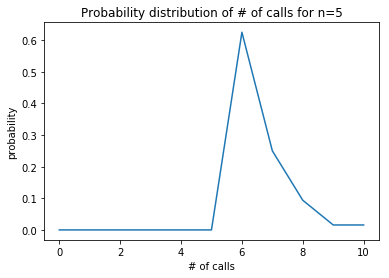

In [204]:
from matplotlib import pyplot as plt

plt.plot(distribution(5))

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=5")

plt.show()

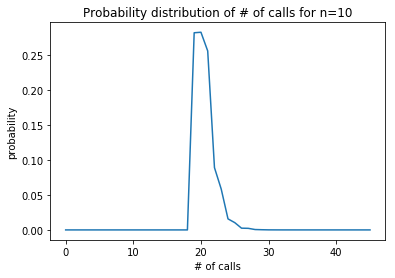

In [205]:
plt.plot(distribution(10))

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=10")

plt.show()

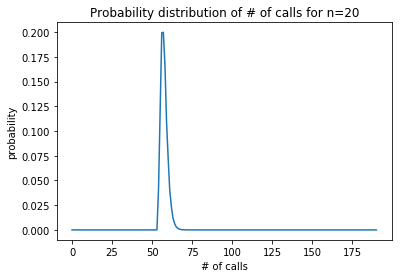

In [305]:
plt.plot(distribution(20))

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=20")

plt.show()

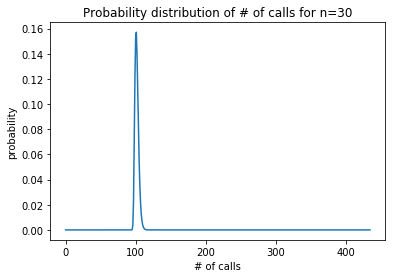

In [306]:
plt.plot(distribution(30))

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=30")

plt.show()

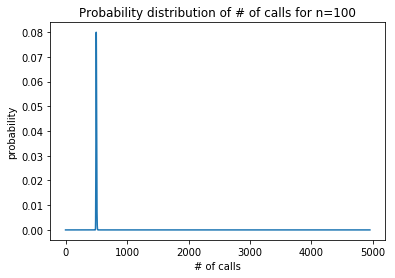

In [308]:
plt.plot(distribution(100))

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=100")

plt.show()

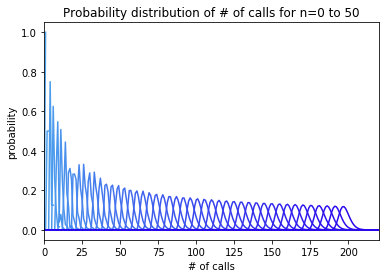

In [309]:
for i in range(0, 50):
    plt.plot(distribution(i), color=(0.31 - 0.003*i, 0.67 - 0.013*i, 0.93))
    
    plt.xlim([0, 220])

plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Probability distribution of # of calls for n=0 to 50")

plt.show()

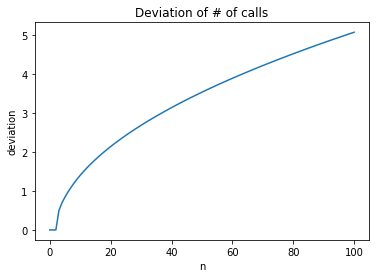

In [382]:
def coordinates(x):
    return numpy.linspace(0, x.size - 1, x.size)

def expectation(x):
    return (x*coordinates(x)).sum()

def variance(x):
    return (x*coordinates(x)**2).sum() - expectation(x)**2

def deviation(x):
    return numpy.sqrt(variance(x))

derivations = numpy.array([numpy.sqrt(variance(distribution(k))) for k in range(0, 101)])
plt.plot(derivations)

plt.title("Deviation of # of calls")
plt.xlabel("n")
plt.ylabel("deviation")

plt.show()

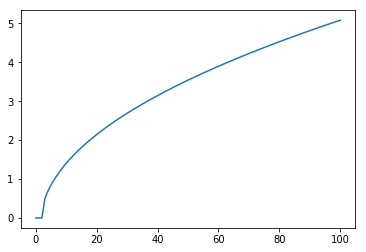

In [383]:
def log_interp(zz, xx, yy):
    logz = numpy.log10(zz)
    logx = numpy.log10(xx)
    logy = numpy.log10(yy)
    return numpy.power(10.0, numpy.interp(logz, logx, logy))

plt.plot(log_interp(coordinates(derivations) + 1e-30, coordinates(derivations) + 1e-30, derivations + 1e-30))

In [384]:
print("Expectation of # of calls (n = 10)")
expectation(distribution(10))

Expectation of # of calls (n = 10)


20.48162248956214

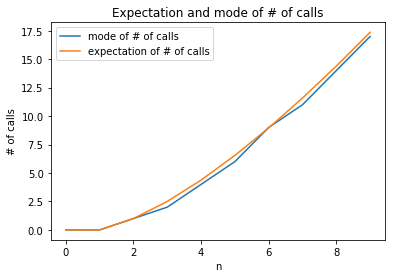

In [214]:
plt.plot([distribution(k).argmax() for k in range(0, 10)], label="mode of # of calls")
plt.plot([expectation(distribution(k)) for k in range(0, 10)], label="expectation of # of calls")

plt.xlabel("n")
plt.ylabel("# of calls")
plt.title("Expectation and mode of # of calls")

plt.legend()

plt.show()

$n\dot\log n$ !!!!!

$n\dot\log n$ を讃えよ !!!!!

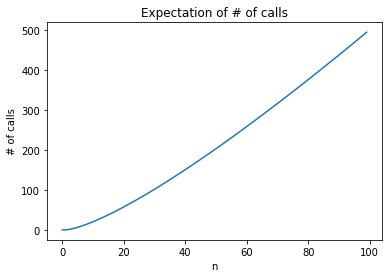

In [216]:
plt.plot([expectation(distribution(k)) for k in range(0, 100)])

plt.xlabel("n")
plt.ylabel("# of calls")
plt.title("Expectation of # of calls")

plt.show()

## kennzann


In [250]:
kenz = numpy.zeros(distribution(7).size)

for i in range(0, 10000):
    count = 0
    def f(a, b):
        global count
        count += 1
        return random() < 0.5
    sort([1,2,3,4,5,6,7], f)
    kenz[count] += 1

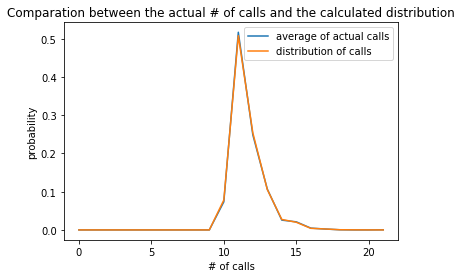

In [253]:
plt.plot(kenz/kenz.sum(), label="average of actual calls")
plt.plot(distribution(7), label="distribution of calls")
plt.legend()
plt.xlabel("# of calls")
plt.ylabel("probability")
plt.title("Comparation between the actual # of calls and the calculated distribution")

plt.show()